In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

# 0. 전체 데이터 plot

(950400, 7)
Generated Data in one plot


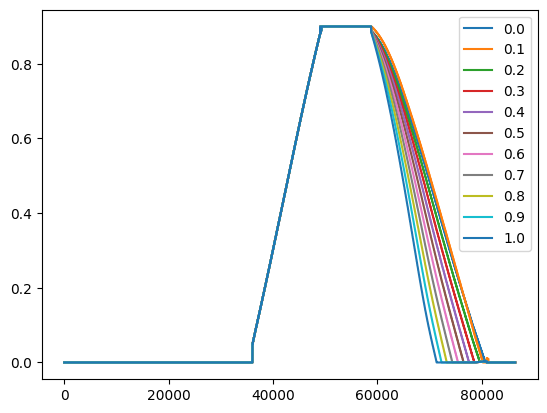

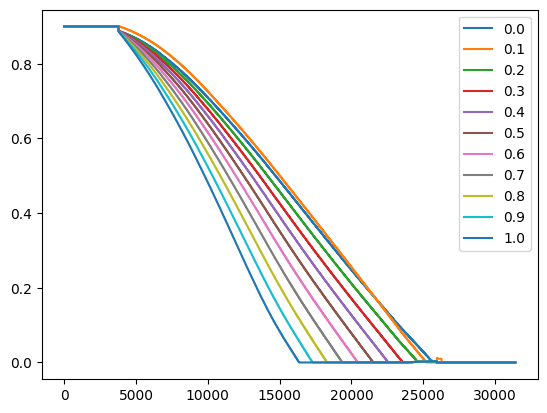

In [ ]:
"""
./forecasted_soc_result.npy에는 모든 intensity에 대해 generated된 데이터가 있습니다.
"""

soc_column_index = 2

data = np.load('./forecasted_soc_result.npy')
print(data.shape)

print("Generated Data in one plot")
# Full plot
for i in range(0, 11):
    plt.plot(data[i*86400: (i+1)*86400, soc_column_index], label=i/10)
plt.legend()
plt.show()

# section plot
for i in range(0, 11):
    plt.plot(data[i*86400 + 55000: (i+1)*86400, soc_column_index], label=i/10)
plt.legend()
plt.show()

# Insert intensity 0, 0.3, 0.7 into csv file

## 1. Collect

(86400,)
(86400,)
(86400,)


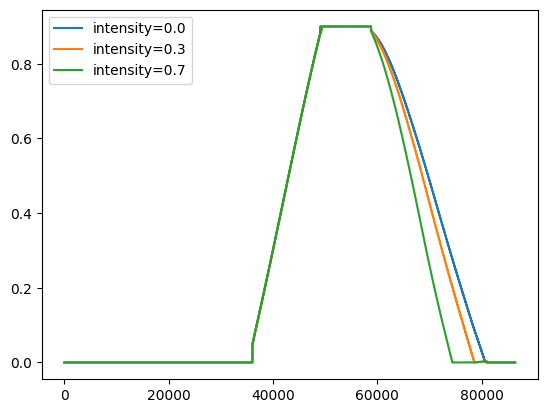

In [ ]:
"""
필요한 3개의 데이터만 수집.
"""

collected_intensity = [0, 3, 7]

collected_soc = []
for i in collected_intensity:
    collected_soc.append(data[i*86400:(i+1)*86400, soc_column_index])

for _data, intensity in zip(collected_soc, collected_intensity):
    plt.plot(_data, label=f'intensity={intensity/10}')
    plt.legend()
plt.show()

## 2. Merge & Check

Merged SOC shape: (259200,)
✅ Forecasted_SOC 열이 추가된 파일이 저장되었습니다: ./dummy.csv


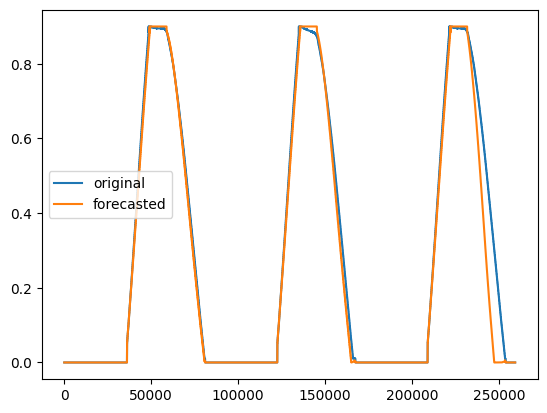

In [19]:
"""
기존 csv파일에 merge후 check
"""

merged_soc = np.concatenate(collected_soc, axis=0)
print("Merged SOC shape:", merged_soc.shape)

# --- CSV 파일에 열 추가하기 ---
# pandas로 다시 로드 (header 포함)
df = pd.read_csv('./preprocessed_and_anomaly_results.csv')

# merged_soc 길이가 전체 행 수보다 짧거나 길 수 있으므로 맞춰줌
min_len = min(len(df), len(merged_soc))
df = df.iloc[:min_len].copy()
df["Forecasted_SOC"] = merged_soc[:min_len]

# 결과 저장
save_path = "./dummy.csv" # 기존 파일에 update하고 싶으면 이름을 똑같이 만드십시오.
df.to_csv(save_path, index=False)
print(f"✅ Forecasted_SOC 열이 추가된 파일이 저장되었습니다: {save_path}")

plt.plot(data['BANK_SOC'], label='original')
plt.plot(data['Forecasted_SOC'], label='forecasted')
plt.legend()
plt.show()